<a href="https://colab.research.google.com/github/AstridSerruto/Natural-Language-Procesing/blob/master/Biden_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#Get authorization to use API
consumer_key = 'bmAwDAGkvpUftEIwNdV136ZIW'
consumer_secret = 'ufjZg1jNrZXb0LcSILfyvFzL67DxjvvM46MQVkFBQpYUZpkRS0'
access_token = '1180545866425409536-Mh3SnW1n6Nmsayz3wpYbmPmoJmXUl1'
access_token_secret = 'lqEnbXWSaRwtmWLzogOJKSNSrMTbiumyIXZf3aool6ZeQ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

user = api.me()
print(user.name)

Abkhe


In [ ]:
#Extract latest tweets
tweets = []

for page in range(1,5):
  tweets.extend(api.user_timeline(screen_name='joebiden', count=200, page=page))

  print('Number of tweets extracted: {}. \n'.format(len(tweets)))

Number of tweets extracted: 200. 

Number of tweets extracted: 400. 

Number of tweets extracted: 600. 

Number of tweets extracted: 800. 



In [ ]:
for tweet in tweets[:5]:
  print(tweet.text)

From tackling climate change to making community college free for all — I've got big plans for the country.

And I'… https://t.co/ILqzPOdjG6
I’ve spent my entire career fighting for a more just, safe, and prosperous America — and I’m not finished yet. https://t.co/cS3LPT7afX
COVID-19 cases are on the rise across the nation.

But instead of leading by example, Donald Trump continues to put… https://t.co/qLJdT2e1uK
I’m in Durham, North Carolina, encouraging folks to make their plan to vote early. Tune in — and then head to… https://t.co/EF0GyybFsx
Folks, if you live in Illinois, today is your last day to register to vote online. Don’t wait, head to… https://t.co/GKVQfIT9IS


In [ ]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False]
for tweet in tweets[:5]:
  print(tweet.text)

From tackling climate change to making community college free for all — I've got big plans for the country.

And I'… https://t.co/ILqzPOdjG6
I’ve spent my entire career fighting for a more just, safe, and prosperous America — and I’m not finished yet. https://t.co/cS3LPT7afX
COVID-19 cases are on the rise across the nation.

But instead of leading by example, Donald Trump continues to put… https://t.co/qLJdT2e1uK
I’m in Durham, North Carolina, encouraging folks to make their plan to vote early. Tune in — and then head to… https://t.co/EF0GyybFsx
Folks, if you live in Illinois, today is your last day to register to vote online. Don’t wait, head to… https://t.co/GKVQfIT9IS


In [ ]:
#Create DataFrame for tweets.
df = pd.DataFrame(data=[[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets], columns=['Date', 'Tweet', 'Length', 'ID', 'Likes', 'Retweets'])

df.head()

,Date,Tweet,Length,ID,Likes,Retweets
0,2020-10-18 20:00:00,From tackling climate change to making communi...,140,1317918374341476353,16856,3311
1,2020-10-18 19:15:00,I’ve spent my entire career fighting for a mor...,134,1317907047099191297,13666,3190
2,2020-10-18 18:30:00,COVID-19 cases are on the rise across the nati...,140,1317895724105895939,29277,6582
3,2020-10-18 17:34:22,"I’m in Durham, North Carolina, encouraging fol...",134,1317881721111539719,9156,2190
4,2020-10-18 17:00:00,"Folks, if you live in Illinois, today is your ...",127,1317873073345921024,11100,3447


In [ ]:
df[df['Likes']==df['Likes'].max()]

,Date,Tweet,Length,ID,Likes,Retweets
335,2020-09-30 01:49:00,Donald Trump is the worst president we've ever...,51,1311120831032909825,1895371,318969


In [ ]:
df['Likes'].describe()


count    8.000000e+02
mean     9.297719e+04
std      1.537577e+05
min      0.000000e+00
25%      1.650100e+04
50%      3.794900e+04
75%      1.039975e+05
max      1.895371e+06
Name: Likes, dtype: float64

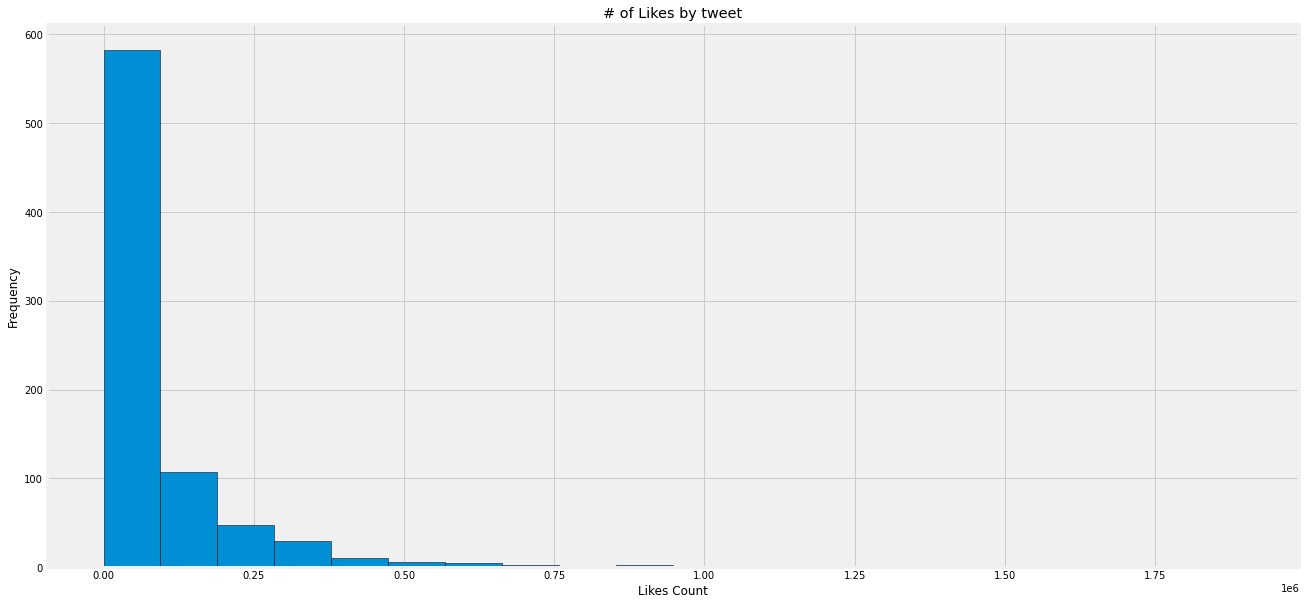

In [ ]:
df['Likes'].plot(kind='hist', bins=20, figsize=(20, 10), ec='black')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.title('# of Likes by tweet')
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()
f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['Tweet'].apply(f)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Date,Tweet,Length,ID,Likes,Retweets,Sentiment
0,2020-10-18,From tackling climate change to making communi...,140,1317918374341476353,16856,3311,0.5106
1,2020-10-18,I’ve spent my entire career fighting for a mor...,134,1317907047099191297,13666,3190,0.5829
2,2020-10-18,COVID-19 cases are on the rise across the nati...,140,1317895724105895939,29277,6582,0.0000
3,2020-10-18,"I’m in Durham, North Carolina, encouraging fol...",134,1317881721111539719,9156,2190,0.5267
4,2020-10-18,"Folks, if you live in Illinois, today is your ...",127,1317873073345921024,11100,3447,0.0000


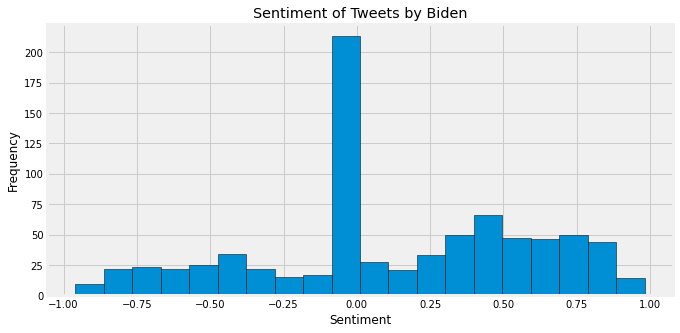

In [ ]:
#Where do sentiment lay.
df['Sentiment'].plot(kind='hist', bins=20, figsize=(10,5), ec='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment of Tweets by Biden')
plt.show()

In [ ]:
date_df = df.groupby(['Date']).mean().reset_index()

Text(0.5, 0, 'Daily Average Sentiment of Tweets')

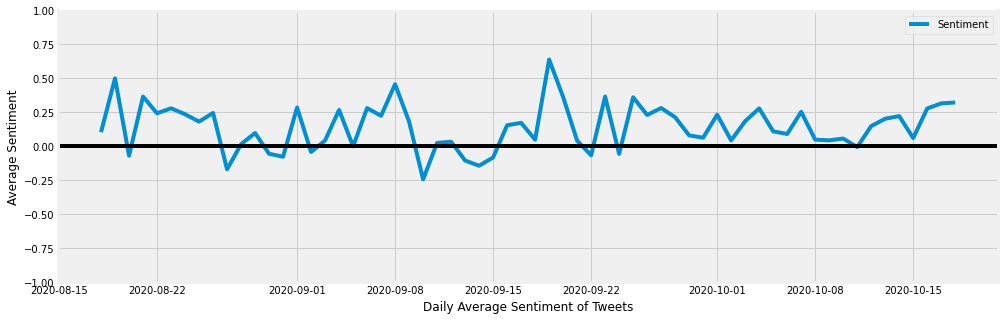

In [ ]:
date_df.plot(kind='line', x='Date', y='Sentiment', figsize=(15,5), ylim=[-1,1])
plt.axhline(y=0, color='black')
plt.ylabel('Average Sentiment')
plt.xlabel('Daily Average Sentiment of Tweets')

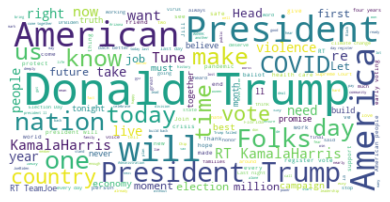

In [ ]:
#Creating word cloud
from wordcloud import WordCloud, STOPWORDS

text =  " ".join(text for text in df.Tweet)

stopwords = set(STOPWORDS)
stopwords.update(['HTTPS', 'CO'])

wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()